In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importando os dados
Acho mais simples visualizar os dados usando um dataframe. Em contrapartida, para *inputar* os *missing values* é melhor trabalhar com um array, além de ser o formato de entrada para o modelo.

In [43]:
train_pd = pd.read_csv('train.csv')
test_pd = pd.read_csv('test.csv')

X_train = train_pd.drop('Transported', axis=1)
Y_train = train_pd['Transported'].copy()
Y_train = Y_train.astype(int)

# *Exploratory Data Analysis* (EDA)

Esta é a etapa onde eu vejo correlações entre os dados, quantos *missing values* existem em cada *feature*, entre outras informações relevantes para preparar os dados antes de treinar o mdoelo

## Descrição geral dos dados

Primeiro de tudo, quero ver a descrição de cada *feature*: quantos valores únicos (*unique*) existem em cada *feature*, o valor mais frequente (*top*) e quantas vezes ele aparece (*freq*). Para os dados numéricos pode ser interessante saber valores como: máximo, mínimo, média, moda (mesmo que o *top*) e desvio padrão. As porcentagens representam os numéros que dividem os dados, por exemplo, para uma série (que é um df com 1 coluna) com linhas iguais a 1, 2 e , os percentis 25%, 50% e 75% são respectivamente: 1.5, 2 e 2.5. 

In [44]:
train_pd.describe(include='all', percentiles=[.25, .45,.5,.75])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
45%,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


## Missing values

O primeiro passo aqui é ver quantos *missing values* existem para cada *feature*.

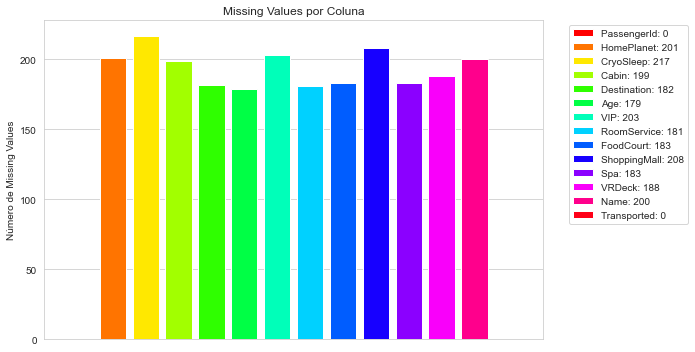

In [45]:
miss = train_pd.isnull().sum() #dataframe com os missing values

plt.figure(figsize=(10, 5))
cores = plt.cm.get_cmap('hsv', len(miss)) #mapa de cores

barras = plt.bar(range(len(miss)), miss.values, color=cores(range(len(miss))))

plt.xticks([])
plt.ylabel('Número de Missing Values')
plt.title('Missing Values por Coluna')

plt.legend(barras, [f"{idx}: {val}" for idx, val in miss.items()], bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.show()

Existem mais ou menos uma quantidade igual de *missing values* para cada *feature*. Agora, vou começar a olhar cada tipo de dado (numérico, binário e categórico).

## Dados numéricos

Vou olhar para os histogramas dos dados numéricos. Vou adicionar uma variável correspondente ao fator limitante de visualização dos gastos (todos features numéricos com excessão da idade são relativos aos gastos dos passageiros aqui). Com isso consigo excluir quem não gastou nada, e ver quantas pessoas gastaram algo em cada feature. Além disso, vou incluir um novo feature que corresponde ao gasto total de cada passageiro. 

In [46]:
numerical_features = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] #categorias numéricas

train_pd['TotalSpending'] = train_pd[numerical_features[1:]].fillna(0).sum(axis=1) # adiciona o valor total gasto por passageiro

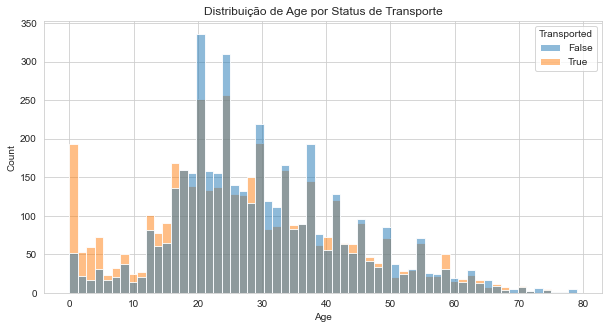

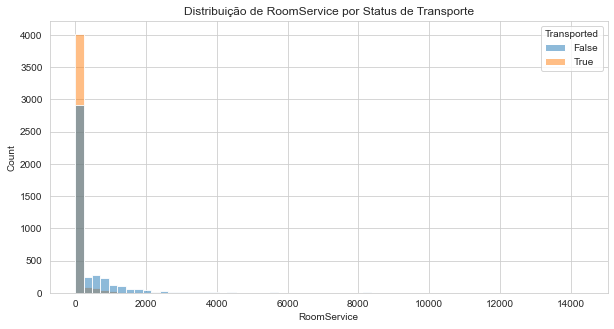

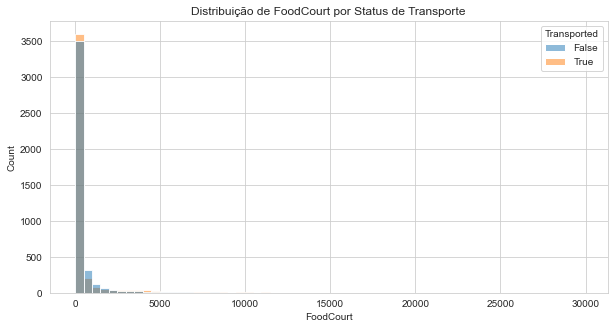

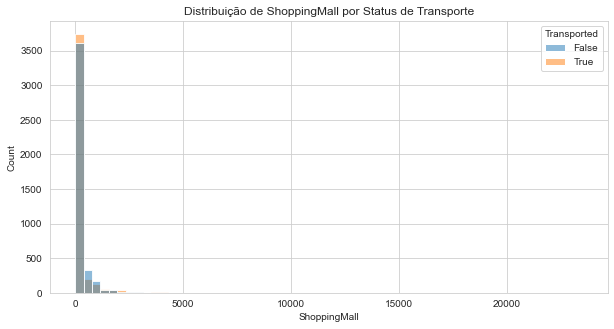

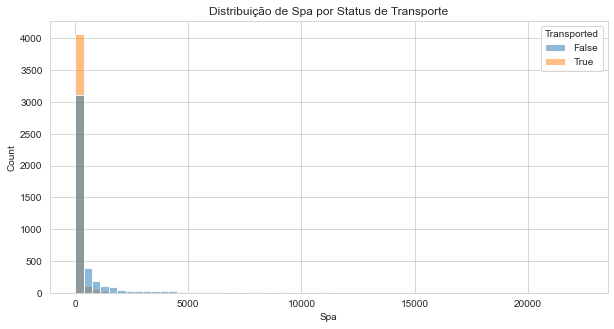

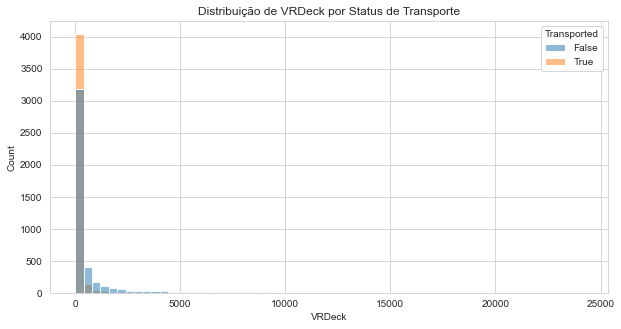

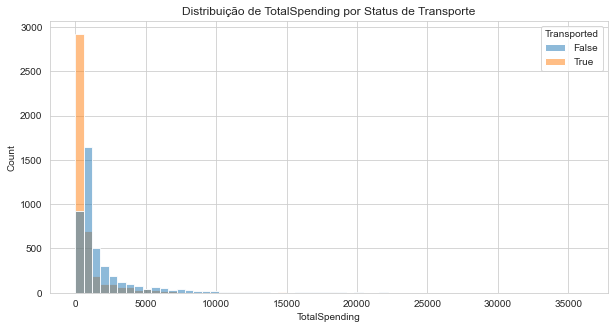

In [47]:
numerical_features = numerical_features + ['TotalSpending']
uplim = 1e9 #filtra os valores, usei para ver os valores maiores que 0 (da para mudar e verificar quem gastou muito em cada uma)
downlim = -1
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    if col == 'Age':
        train_nozero = train_pd[(train_pd[col] > downlim) & (train_pd[col] < uplim)][[col, 'Transported']].copy().fillna(0)
        sns.histplot(data=train_nozero, x=col, hue='Transported', 
                 bins=60, kde=False, element='bars', legend=True)
        plt.title(f'Distribuição de {col} por Status de Transporte')
        plt.show()
        continue

    train_nozero = train_pd[(train_pd[col] > downlim) & (train_pd[col] < uplim)][[col, 'Transported']].copy().fillna(0)
    sns.histplot(data=train_nozero, x=col, hue='Transported', 
             bins=60, kde=False, element='bars', legend=True)
    plt.title(f'Distribuição de {col} por Status de Transporte')
    plt.show()



Analisando os histogramas acima notei que a maioria das pessoas que foram transportadas **não** gastaram nada, enquanto apenas menos de 1000 pessoas não transportadas deixaram de gastar. Esse padrão se confirma nos gastos detalhados, mas com uma diferença mínima para o FoodCourt e ShoppingMall. É interessante então olhar para a matriz de correlação dos dados.

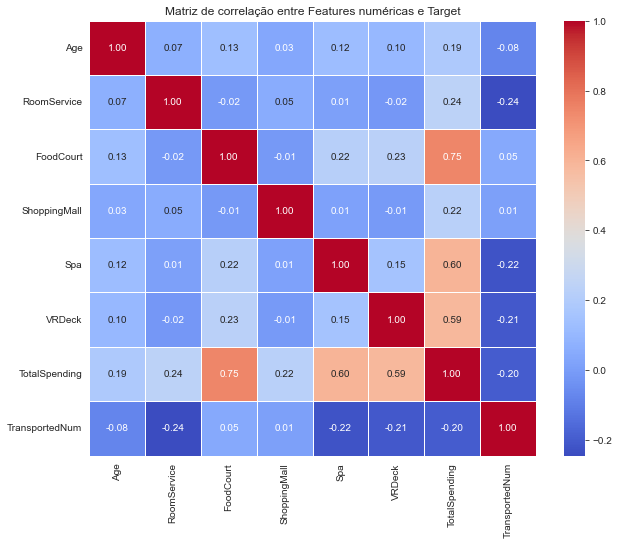

In [48]:
train_cp = train_pd.copy() #Criando uma cópia para não alterar os dados
train_cp['TransportedNum'] = train_cp['Transported'].astype(int) #Converte boolean pra int

comat = train_cp[numerical_features+['TransportedNum']].corr() #dataframe quadrado, correspodente à matriz de correlação

plt.figure(figsize=(10,8))
sns.heatmap(comat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) #mapa de calor da matriz de correlação
plt.title('Matriz de correlação entre Features numéricas e Target')
plt.show()

Como esperado, a correlação entre a *target variable* e as features FoodCourt e ShoppingMall é quase 0, visto que ambas variavam pouco entre transportado ou não nos histogramas observados. Apesar de ainda baixa, existe correlação das demais *features* numéricas de compras com a *target variable*. A idade parece ter relevância apenas com o gasto total. Lembrando que estamos verificando apenas a correlação linear. 

## Dados categóricos e binários

Vou olhar para ambos ao mesmo tempo por 2 motivos: Vou utilizar a mesma visualização para os 2 tipos (pie plot), já que quero olhar a frequência com que cada um aparece em cada caso (transportado ou não) e pretendo utilizar um método de codificação dos dados categóricos que cria colunas para cada valor único, com valores **binários** para representar se aquela amostra possui aquele valor único ou não (*one-hot encoding*).

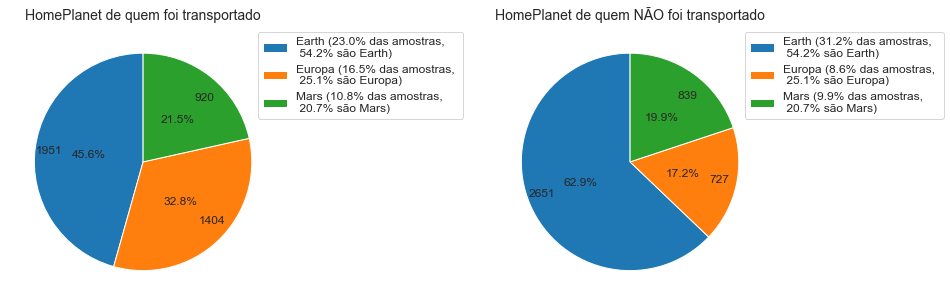

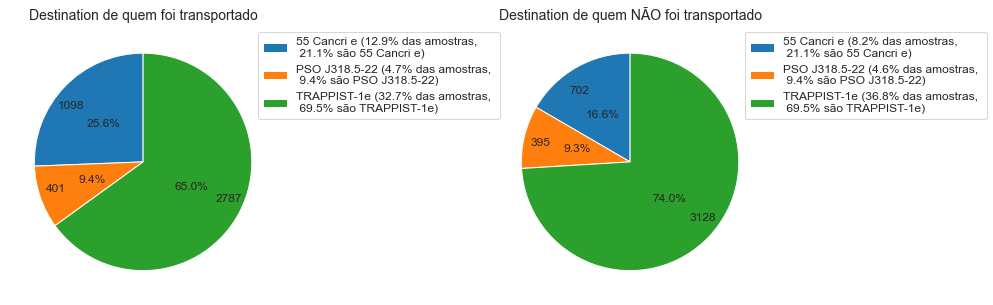

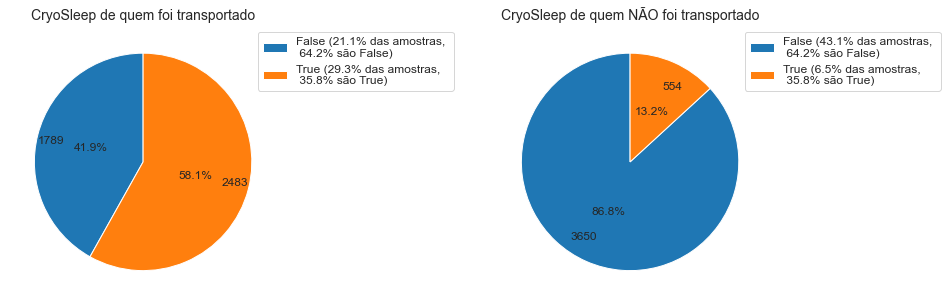

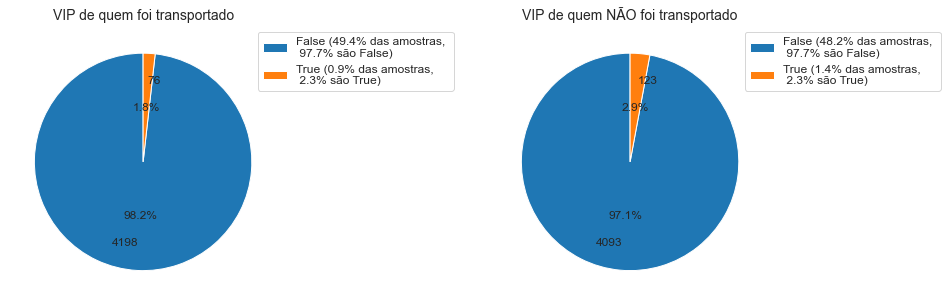

In [49]:
categorical_features = ['HomePlanet', 'Destination']
binary_features = ['CryoSleep', 'VIP']
cat_e_bin = categorical_features+binary_features
fs = 12 #tamanho da fonte

for col in cat_e_bin:
    counts_all = train_pd[col].value_counts() #contagem de todos as linhas

    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5)) #subplot, com 2 plots para cada conjunto de dados

    #primeiro plot (transportados)
    counts_trans = train_pd[train_pd['Transported']==True][col].value_counts().sort_index()
    ax1.pie(
        counts_trans, 
        labels=counts_trans, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'fontsize':fs},
        labeldistance=.75,
        pctdistance = .5
        )
    ax1.set_title(f'{col} de quem foi transportado', fontsize=fs+2)
    ax1.legend(
        [
            f'{idx} ({val/sum(counts_all)*100:.1f}% das amostras, \n {counts_all[idx]/sum(counts_all)*100:.1f}% são {idx})' for idx,val in counts_trans.items()
            ], 
            bbox_to_anchor=(.9, 1), 
            fontsize=fs
            )

    #segundo plot (NÃO transportados)
    counts_nottrans = train_pd[train_pd['Transported']==False][col].value_counts().sort_index()
    ax2.pie(
        counts_nottrans, 
        labels=counts_nottrans, 
        autopct='%1.1f%%', 
        startangle=90, 
        textprops={'fontsize':fs},
        labeldistance=.75,
        pctdistance = .5
        )
    ax2.set_title(f'{col} de quem NÃO foi transportado', fontsize=fs+2)
    ax2.legend(
        [
            f'{idx} ({val/sum(counts_all)*100:.1f}% das amostras, \n {counts_all[idx]/sum(counts_all)*100:.1f}% são {idx})' for idx,val in counts_nottrans.items()
            ], 
            bbox_to_anchor=(.9, 1), 
            fontsize=fs
            )

Os gráficos acima podem parecer cheios de informação, mas decidi colocá-las para analisar o valor relativo de cada um. Por exemplo, quem iria para TRAPPIST-1e representa 65% das pessoas transportadas, mas 69.5% do total tem destino final TRAPPIST-1e, então parece não existir uma correlação entre esse destino e a *target variable*. Por outro lado, 45.6% das pessoas transportadas vieram da terra, enquanto que 54.2% do total tem essa mesma origem, indicando uma possível relação entre pessoas transportadas e seu planeta de origem. Tal correlação com o planeta de origem existe de maneira invertida com Europa, e parece não existir para Marte (ou seja, a porcentagem das pessoas transportadas ou não que vierem de Marte é bem parecida). 

Já para os dados binários podemos observar que 64.2% dos passageiros NÃO estavam em sono criogênico, mas apenas 41.9% destes foram transportados. Indicando uma possível probabilidade maior de ter sido transportado se estiver em sono criogênico. As pessoas VIP representam uma parcela pequena da população (2.3%), impossibilitando concluir algo relevante. 

# Pré-processamento

Agora vou começar o pré-processamento dos dados. Para isso vou levar em consideração um modelo geralmente utilizado para problemas de classificação, o *random forest* (um conjunto de árvores de decisões - *decision trees*). Nessa etapa existem 2 passos fundamentais: Codificar os dados categóricos e lidar com os *missing values*. O método de codificação para os dados categóricos consiste em criar novas colunas para cada valor único dos dados categóricos, com valores binários, com 1 se aquele valor único pertence àquela linha e 0 se não. Esse método chama-se *one-hot encoding*. 

O modelo escolhido utiliza várias *decision trees*, e por votação majoritária decide o resultado (se a maioria das árvores colocou, por exemplo, True para aquela linha, o True é que vence). Esse método também reduz o chamado *overfitting*, já que o *random forest* utiliza o método de bootstrap no treinamento, onde cada árvore possui apenas uma parcela aleatória do conjunto de dados. Isso faz com que o algorítimo não se ajusta excessivamente, o que poderia acontecer com uma só árvore. Esse modelo também lida bem com os *outliers* (valores muito distintos do restante do conjunto), já que é feita uma média com todas as árvores e algumas (ou todas) essas árvores podem nem ter usado esses dados *outliers*. 

## *Missing values imput*

Vou lidar com os *missing values* de maneira diferente para cada tipo de dado. 

### Numéricos
Vou substituir com a mediana (valor que separa o conjunto de dados em 2 conjuntos de mesmo tamanho), o que reduz ainda mais o problema com outliers. 

### Binários
Vou apenas utilizar a moda nesse caso (valor mais frequente).

### Categórico
Aqui o one-hot encoding vai tratar os *missing values* como um valor único

## Funções de pré-processamento

In [94]:
#processando dados categóricos
def process_categ(categorical, add_nan=True):
    new_categ = pd.get_dummies(categorical, dummy_na=add_nan, dtype=int) 
    return new_categ

#processando dados binários
def process_bin(binary, add_nan=True):
    cols = []
    for col_name in binary.columns:
        if add_nan:
            nan_ind = binary[col_name].isna().astype(int)
            nan_ind.name = f"{col_name}_isnan"
            cols.append(nan_ind)

        bool2int = binary[col_name].fillna(False).astype(int)
        bool2int.name = col_name
        cols.append(bool2int)

    new_bin = pd.DataFrame()
    if cols:
        new_bin = pd.concat(cols, axis=1)
    return new_bin

#processando dados numéricos
def process_num(numerical, normalize=True, add_nan=True):
    nan_df = pd.DataFrame()
    if add_nan:
        nan_list = []
        for col_name in numerical.columns:
            indicator = numerical[col_name].isna().astype(int)
            indicator.name = f"{col_name}_isnan"
            nan_list.append(indicator)

        if nan_list:
            nan_df = pd.concat(nan_list, axis=1)

    new_num = numerical.copy()
    medians = new_num.median()
    new_num = new_num.fillna(medians)

    if normalize:
        mins = new_num.min()
        maxs = new_num.max()
        range = maxs - mins
        new_num = (new_num - mins) / range

    if add_nan and not nan_df.empty:
        final_df = pd.concat([new_num, nan_df], axis=1)
    else:
        final_df = new_num

    return final_df

## Aplicando o pré processamento nos dados de treino

In [98]:
new_bin_tr = process_bin(train_pd[binary_features],add_nan=False)
new_cat_tr = process_categ(train_pd[categorical_features], add_nan=False)
new_num_tr = process_num(train_pd[numerical_features], normalize=False, add_nan=False)

new_train = pd.concat([new_bin_tr,new_cat_tr,new_num_tr],axis=1)

new_train.shape

(8693, 15)

# Treinando e avaliando o modelo

Aqui começo a utilizar os dados pré-processados para treinar o modelo. Vou separar os dados: 80% para treinar o modelo e 20% para avaliar sua eficiência. Para isso, vou utilizar bibliotecas do scikit learn. 

### Importando as bibliotecas

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

## Separando os dados

In [99]:
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(
    new_train,
    Y_train,
    test_size=.2,
    stratify=Y_train,
    random_state=10
)

## Treinando o modelo

In [101]:
model = RandomForestClassifier(n_estimators=800,
                               max_depth=10,
                               min_samples_split=3,
                               min_samples_leaf=5,
                               random_state=10,
                               n_jobs=-1)
model.fit(X_train_split, Y_train_split)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=800, n_jobs=-1, random_state=10)

In [110]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
param_distributions = {
    'n_estimators': randint(100, 1000), # Número de árvores entre 100 e 999
    'max_depth': [10, 15, 20, 25, 30, None], # Profundidades para testar (None = sem limite)
    'min_samples_split': [5, 10, 15, 20], # Mínimo para dividir nó
    'min_samples_leaf': [3, 5, 7, 10],    # Mínimo por folha
    'max_features': ['sqrt', 'log2', 0.5], # Features por split ('sqrt' é o default)
    'criterion': ['gini', 'entropy'],      # Critério de divisão
}

n_iterations = 25
cv_folds=5

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=n_iterations,
    cv=cv_folds,
    scoring='accuracy', # Ou 'f1' ou 'roc_auc'
    verbose=2, # Mostra mais detalhes do progresso
    random_state=42, # Para reprodutibilidade da busca
    n_jobs=-1 # Paraleliza os folds
)

print(f"Iniciando RandomizedSearch com {n_iterations} iterações e CV={cv_folds}...")
random_search.fit(X_train_split, Y_train_split)
print("Busca concluída.")

print("\nMelhores Hiperparâmetros encontrados:")
print(random_search.best_params_)

model = random_search.best_estimator_

Iniciando RandomizedSearch com 25 iterações e CV=5...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Busca concluída.

Melhores Hiperparâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 20, 'n_estimators': 879}


## Métricas de avaliação do modelo

In [111]:
y_pred_split = model.predict(X_test_split)
accu = accuracy_score(Y_test_split, y_pred_split, normalize=True)
print(f'{accu*100:.1f}%')

78.8%


Matriz de Confusão (valores):
[[649 214]
 [177 699]]


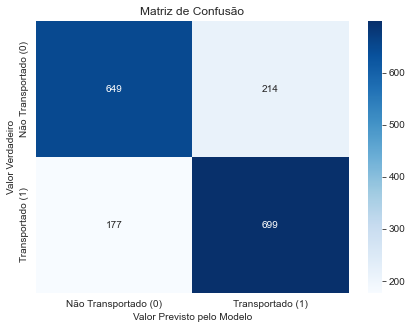

In [112]:
cm = confusion_matrix(Y_test_split, y_pred)
print("Matriz de Confusão (valores):")
print(cm)

plt.figure(figsize=(7, 5))
class_labels = ['Não Transportado (0)', 'Transportado (1)']

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Valor Previsto pelo Modelo')
plt.ylabel('Valor Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [115]:
report = classification_report(Y_test_split, y_pred_split, target_names=class_labels)
print("\nRelatório de Classificação:")
print(report)


Relatório de Classificação:
                      precision    recall  f1-score   support

Não Transportado (0)       0.80      0.76      0.78       863
    Transportado (1)       0.78      0.81      0.79       876

            accuracy                           0.79      1739
           macro avg       0.79      0.79      0.79      1739
        weighted avg       0.79      0.79      0.79      1739



Importância das Features (ordenada):
TotalSpending                0.242844
CryoSleep                    0.121890
Spa                          0.106211
FoodCourt                    0.098404
VRDeck                       0.082326
Age                          0.078340
RoomService                  0.077663
HomePlanet_Earth             0.063073
ShoppingMall                 0.061248
HomePlanet_Europa            0.036769
HomePlanet_Mars              0.012795
Destination_TRAPPIST-1e      0.007409
Destination_55 Cancri e      0.007152
Destination_PSO J318.5-22    0.003120
VIP                          0.000757
dtype: float64


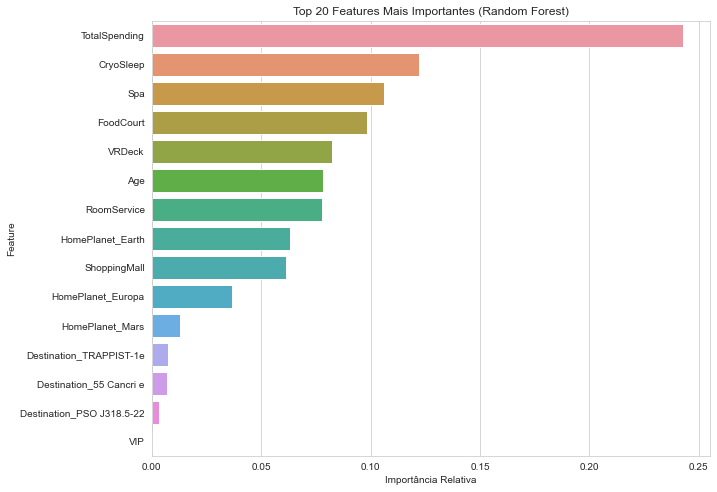

In [114]:
# 1. Obter as importâncias
importances = model.feature_importances_

# 2. Obter os nomes das features na ordem correta
feature_names = X_train_split.columns

# 3. Criar uma Série pandas para combinar nomes e importâncias
feature_importance_series = pd.Series(importances, index=feature_names)

# 4. Ordenar as features pela importância (da maior para a menor)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# 5. Imprimir a lista ordenada
print("Importância das Features (ordenada):")
print(sorted_feature_importances)

# 6. (Opcional, mas recomendado) Visualizar as N features mais importantes
plt.figure(figsize=(10, 8)) # Ajuste o tamanho conforme necessário

# Defina quantas features top você quer mostrar (ex: 15 ou 20)
top_n = 20

sns.barplot(x=sorted_feature_importances.head(top_n).values,
            y=sorted_feature_importances.head(top_n).index)

plt.title(f'Top {top_n} Features Mais Importantes (Random Forest)')
plt.xlabel('Importância Relativa')
plt.ylabel('Feature')
plt.show()